# CNN augmented image generator
Course 2 - Week 2

This code based over the code provided during the:

**Tensorflow in Practice** - Coursera Specialization.

Original code repo: https://github.com/lmoroney/dlaicourse

To maximize the learning all the notebooks will be modified by keeping the underling goals. Finally, the ultimate goal is to learn best practices in the usage of TF an not to obtain for each notebook the best possible model.

### Download data

### Imports

In [2]:
import os
import zipfile, fnmatch

import tensorflow as tf
from tensorflow import keras

In [3]:
# check gpu
print(tf.config.experimental.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
LOCAL_ZIP = "C:\git\TF_coursera\data"
PATTERN = '*.zip'

In [5]:
def unzip(rootPath, pattern):
    for root, dirs, files in os.walk(rootPath):
        unzip_path = []
        for filename in fnmatch.filter(files, pattern):
            unzip_path.append(os.path.join(root, filename.split(".")[0]))
            print(os.path.join(root, filename))
            zipfile.ZipFile(os.path.join(root, filename)).extractall(os.path.join(root, os.path.splitext(filename)[0]))
    return unzip_path

In [6]:
main_path = unzip(LOCAL_ZIP, PATTERN)

C:\git\TF_coursera\data\cats_and_dogs.zip


In [7]:
base = "C:/git/TF_coursera/data/cats_and_dogs/"
train_dir = os.path.join(base, 'cats_and_dogs_filtered/train')
validation_dir = os.path.join(base, 'cats_and_dogs_filtered/validation')

### Baseline CNN model

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [10]:
# model compiler
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

### Image generator

At this time we will introduce some image augmentation to increase the accuracy over time and prevent the model to learn after few epochs

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Updated to do image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=128,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=128,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model training

In [13]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=15,
                    epochs=50,
                    validation_steps=7,
                    verbose=2)

Epoch 1/50
15/15 - 9s - loss: 0.6934 - accuracy: 0.5369 - val_loss: 0.6834 - val_accuracy: 0.6016
Epoch 2/50
15/15 - 9s - loss: 0.6876 - accuracy: 0.5636 - val_loss: 0.6623 - val_accuracy: 0.5491
Epoch 3/50
15/15 - 9s - loss: 0.6953 - accuracy: 0.5556 - val_loss: 0.6713 - val_accuracy: 0.5469
Epoch 4/50
15/15 - 9s - loss: 0.6785 - accuracy: 0.5785 - val_loss: 0.6564 - val_accuracy: 0.6306
Epoch 5/50
15/15 - 9s - loss: 0.6827 - accuracy: 0.6047 - val_loss: 0.7338 - val_accuracy: 0.5201
Epoch 6/50
15/15 - 9s - loss: 0.6596 - accuracy: 0.6111 - val_loss: 0.6452 - val_accuracy: 0.6161
Epoch 7/50
15/15 - 9s - loss: 0.7663 - accuracy: 0.6052 - val_loss: 0.6553 - val_accuracy: 0.6016
Epoch 8/50
15/15 - 9s - loss: 0.6378 - accuracy: 0.6229 - val_loss: 0.6268 - val_accuracy: 0.6562
Epoch 9/50
15/15 - 9s - loss: 0.6377 - accuracy: 0.6245 - val_loss: 0.6052 - val_accuracy: 0.6775
Epoch 10/50
15/15 - 9s - loss: 0.7327 - accuracy: 0.6218 - val_loss: 0.6119 - val_accuracy: 0.6853
Epoch 11/50
15/15 -

### Evaluate model

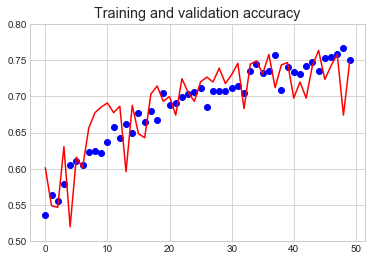

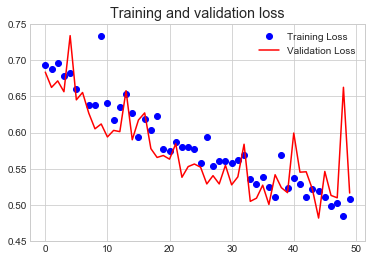

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim((0.50,0.80))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.ylim((0.45,0.75))
plt.legend()

plt.show()

In this specific example data augmentation is acting to keep the model training for several epochs and steadly improving the performances